## **Importação das bibliotecas e dados (AEP e Duas Unas)**

In [26]:
# %pip install ipykernel --break-system-packages
# %pip install scikit-learn --break-system-packages
# %pip install matplotlib --break-system-packages
# %pip install keras --break-system-packages
# %pip install tensorflow --break-system-packages
# %pip install pandas --break-system-packages
# %pip install plotly --break-system-packages
# %pip install seaborn --break-system-packages
# %pip install nbformat --break-system-packages
# %pip install keras --break-system-packages
# %pip install numpy --break-system-packages


In [19]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
base_path = './dataset/'

# carregando arquivo CSV
time_base = 'days'  # Escolha do tipo de agrupamento
duas_unas_dataset = f'{base_path}duas_unas/{time_base}/grouped_1_{time_base}.csv'  # Definição do caminho do diretório do dataset
validation_interval = 97  # Definição da parcela dos dados que serão retiradas do treinamento/teste para validação
time_step = 1  # Number of previous time steps to consider
output_steps = 7  # Number of future steps to predict

# transformando CSV em DataFrame
duas_unas_df = pd.read_csv(duas_unas_dataset)  # Transformação em dataset

duas_unas_validation = duas_unas_df.tail(validation_interval)  # Criação do dataset de validação

indices_to_validate = duas_unas_df.index[-validation_interval:].tolist()  # Obtenção dos índices dos dadoss de validação
duas_unas_df = duas_unas_df.drop(indices_to_validate).reset_index(drop=True)  # Retirada dos dados de validação do dataset original de treino/teste

duas_unas_df['timestamp'] = pd.to_datetime(duas_unas_df['timestamp'])  # Transformação dos dados da coluna 'timestamp' no formato datetime. Ela lida com vários formatos de data/hora e tenta interpretá-los de forma inteligente.
duas_unas_validation['timestamp'] = pd.to_datetime(duas_unas_validation['timestamp'])  # Idem da ação da linha de cima.

duas_unas_df['index'] = range(len(duas_unas_df))  # Criação da coluna 'index' em que os valores vão de zero ao tamanho total do daframe
duas_unas_validation['index'] = indices_to_validate  # Idem da acima da linha acima

duas_unas_df['kwh'] = duas_unas_df['kWh fornecido']  # Criação da coluna 'kwh' que copia os dados da coluna 'kWh fornecido'
duas_unas_validation['kwh'] = duas_unas_validation['kWh fornecido']  # Idem da acima da linha acima

duas_unas_df.drop(columns=['timestamp'], inplace=True)  # Remoção da coluna 'timestamp', inclusive no dataframe original
duas_unas_validation.drop(columns=['timestamp'], inplace=True)  # Idem da acima da linha acima

duas_unas_df.drop(columns=['kWh fornecido'], inplace=True)  # Remoção da coluna 'kWh fornecido', inclusive no dataframe original
duas_unas_validation.drop(columns=['kWh fornecido'], inplace=True)  # Idem da acima da linha acima

X = duas_unas_df['index'].values.reshape(-1,1)  # Cria o array X com os índices do dataframe duas_unas_df
y = duas_unas_df['kwh'].values  # Cria o array y com os dados de energia de duas_unas_df
print(y)
X_validation = duas_unas_validation['index'].values.reshape(-1,1)  # Cria o array X_validation com os índices do dataframe duas_unas_validation
y_validation = duas_unas_validation['kwh'].values  # Cria o array y com os dados de energia de duas_unas_validation
print(X_validation)

[    0.       0.       0.       0.   10827.36 13006.08 15319.8  18987.48
 17251.56 20999.88 21031.92 21016.8  21020.76 21012.12 20981.52 20963.88
 20972.88 20959.56 20954.16 20956.32 20883.24 12201.48 20976.84 20982.6
 20975.76 12625.92 15953.04 20929.68 20908.08 20907.36 20884.32 20883.96
 20895.84 20902.32 20897.64 20891.52 20889.36 19987.56 20921.76 20838.24
 21166.56 21144.96 21129.48 21130.56 21133.44 20858.4  21142.08 21133.44
 21130.2  21134.52 21125.16 21134.16 11596.32 21196.8  20911.68 21114.
 19998.   20545.56 21337.56 21323.16 21318.48 21317.04 21300.84 21293.64
 21295.44 21297.6  21252.96 21242.88 21252.24 21238.56 20969.28 21288.6
 16638.84 21273.12 21191.76 21182.4  21166.92 21105.72 21089.88 21096.
 19790.28 20107.44 21154.32 21130.92 21130.2  21123.   20896.92 21110.4
 21106.08 21107.16 20849.76 21084.84 21081.6  21080.52 20718.36 21105.36
 21096.36 21084.48 21066.48 21060.   20478.96 20815.92 20788.56 20737.44
 20777.4  20788.2  20728.8  20839.32 20830.32 20834.28 208

In [28]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# regr = MLPRegressor(hidden_layer_sizes=(50,50,50), max_iter=200).fit(X_train, y_train)

# y_pred = regr.predict(X_test)

# from sklearn.metrics import mean_squared_error

# rms = mean_squared_error(y_test, y_pred, squared=False)

# plt.figure(figsize=(8, 6))
# plt.scatter(X_test, y_test, color="blue", label="Valores Reais")
# plt.scatter(X_test, y_pred, color="red", label="Previsões", alpha=0.6)
# plt.title(f"Teste do MLPRegressor (RMSE: {rms:.2f})")
# plt.xlabel("Horas (X)")
# plt.ylabel("Previsão (y)")
# plt.legend()
# plt.show()

In [29]:
# print(X_validation)
# y_pred_validation = regr.predict(X_validation)

# plt.figure(figsize=(8, 6))
# plt.scatter(X_validation, y_validation, color="blue", label="Valores Reais")
# plt.scatter(X_validation, y_pred_validation, color="red", label="Previsões", alpha=0.6)
# plt.title(f"Hora da Verdade")
# plt.xlabel("Hora (X)")
# plt.ylabel("Consumo (y)")
# plt.legend()
# plt.show()

In [30]:
# pirapama_dataset = f'{base_path}outras_unidades/pirapama/agrupado_hora_Pirapama_2021.csv'
# # transformando CSV em DataFrame
# pirapama_df = pd.read_csv(pirapama_dataset)

# pirapama_df['Data'] = pd.to_datetime(pirapama_df['Data'])

# pirapama_df['index'] = range(len(pirapama_df))

# pirapama_df['kwh'] = pirapama_df['kWh fornecido'] 

# pirapama_df.drop(columns=['Data'], inplace=True)

# pirapama_df.drop(columns=['kWh fornecido'], inplace=True)

# X_pirapama = pirapama_df['index'].values.reshape(-1,1)
# y_pirapama = pirapama_df['kwh'].values

# y_pred = regr.predict(X_pirapama)

# plt.figure(figsize=(8, 6))
# plt.plot(X_pirapama, y_pirapama, color="blue", label="Valores Reais")
# plt.plot(X_pirapama, y_pred, color="red", label="Valores Previstos")
# plt.title(f"Hora da Verdade")
# plt.xlabel("Hora (X)")
# plt.ylabel("Consumo (y)")
# plt.legend()
# plt.show()

In [31]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_kwh = scaler.fit_transform(duas_unas_df['kwh'].values.reshape(-1, 1))

scaled_kwh_validation = scaler.fit_transform(duas_unas_validation['kwh'].values.reshape(-1,1))

def create_dataset(data, time_step=1, output_steps=1):
    X, y = [], []
    for i in range(len(data) - time_step - output_steps + 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[(i + time_step):(i + time_step + output_steps), 0])
    return np.array(X), np.array(y)

# Create the dataset
X, y = create_dataset(scaled_kwh, time_step, output_steps)

X_validation, y_validation = create_dataset(scaled_kwh_validation, time_step, output_steps)

# Reshape input to be [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)
X_validation = X_validation.reshape(X_validation.shape[0], X_validation.shape[1], 1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(output_steps)) 
model.compile(optimizer='adam', loss='mean_squared_error')

callback = EarlyStopping(monitor='val_loss', min_delta=0.002, patience=5, verbose=0, mode='auto')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=1, callbacks=[callback])

Epoch 1/50


c:\Users\renantorres\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.8883
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8338
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7573 
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6451
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4756
Epoch 6/50
 2/11 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 0.3013  

c:\Users\renantorres\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2621
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0830
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0328
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0336
Epoch 10/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0319 
Epoch 11/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0288 
Epoch 12/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0266
Epoch 13/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0279
Epoch 14/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0290 
Epoch 15/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0254 
Epoch 16/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0279 
Epoch 17/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step - loss: 0.0255
Epoch 18/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0264 
Epoch 19/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0241
Epoch 20/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0249
Epoch 21/50
11/11

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
90 90 1


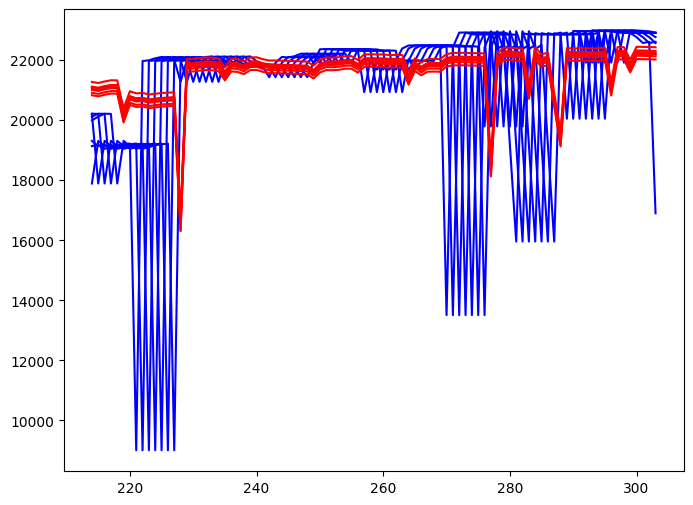

7 7


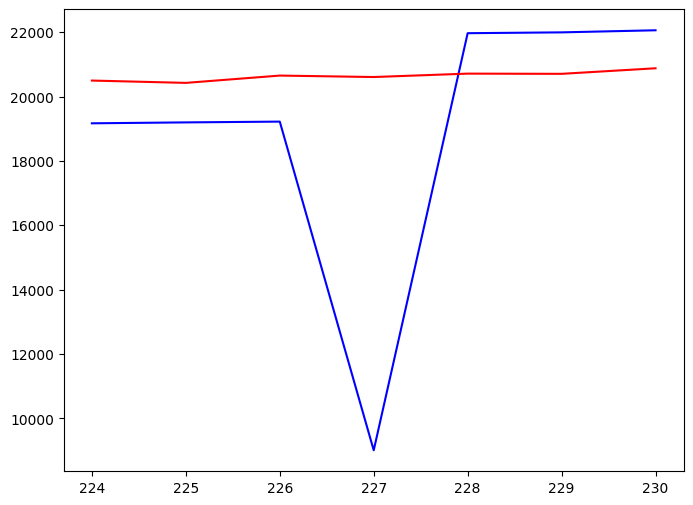

In [39]:
y_pred = model.predict(X_validation)
print(len(X_validation), len(y_pred), len(X_validation[0]))

y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_validation)

indices_to_validate = indices_to_validate[:len(y_pred_rescaled)]

plt.figure(figsize=(8,6))
plt.plot(indices_to_validate, y_test_rescaled, label="Original", color='blue')
plt.plot(indices_to_validate, y_pred_rescaled, label="Predição", color='red')
plt.show()

plt.figure(figsize=(8,6))
print(len(indices_to_validate[0:output_steps]), len(y_test_rescaled[0]))
plt.plot(indices_to_validate[0:output_steps], y_test_rescaled[0], label="Original", color='blue')
plt.plot(indices_to_validate[0:output_steps], y_pred_rescaled[0], label="Predição", color='red')
plt.show()

In [36]:
print(y_pred_rescaled[0])
print(y_test_rescaled[0])


[20909.887 20828.586 21046.037 21007.723 21116.158 21098.395 21271.688]
[19992.96 20116.44 20214.72 20208.24 17891.64 19310.04 19135.44]
